# Data analysis overview

---


The aim of this jupyter notebook is to quick investigate our data by using descriptive statistics, as well as, boxplot, correlation matrix, pairplot. 

## Import library

In [1]:
import os

# Data Manipulation
import numpy as np
import pandas as pd
from scipy.stats import reciprocal
import re                                  

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Load the Data


---


User must enter the name of the path in which dataset is stored. After that, we will check if the directory exists and if it is empty or not.

### *Check directory and files*

In [3]:
def read_dataset ():
  dataset = ''
  path_name = input('Enter the path name for dataset: ')
  path_name = '/content/' + path_name

  if not os.path.exists(path_name):
      print('Error! Invalid path selected.')
  else:
      print(path_name + ' is a valid path.')

      if not os.listdir(path_name):
        print("Warning! Empty directory.")
      else:
        file_name = input('Enter the file name for dataset: ')
        dataset = pd.read_csv(path_name + '/' + file_name + '.csv', sep = ';', index_col = 'ID_Observations' )
  return dataset

### *Load the dataset*

In [4]:
y_coord_dataset = read_dataset()

Enter the path name for dataset: 
/content/ is a valid path.
Enter the file name for dataset: final_dataset_hexagonal


In [5]:
print('y_coord_dataset shape: {}'.format(y_coord_dataset.shape))
print('\n data types: \n{}'.format(y_coord_dataset.dtypes))
print('\ny_coord_dataset content: \n')
y_coord_dataset

y_coord_dataset shape: (2538, 17)

 data types: 
x_1                       float64
x_2                       float64
x_3                       float64
x_4                       float64
x_5                       float64
x_6                       float64
x_7                       float64
x_8                       float64
x_9                       float64
x_10                      float64
Total_n_peaks               int64
Max_peaks_position        float64
Volume                    float64
Crystal_Structure_Type     object
a                         float64
b                         float64
c                         float64
dtype: object

y_coord_dataset content: 



,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,Total_n_peaks,Max_peaks_position,Volume,Crystal_Structure_Type,a,b,c
ID_Observations,,,,,,,,,,,,,,,,,
1000100,10.96,19.02,22.00,22.42,25.02,29.26,29.58,31.62,33.28,37.16,64,19.02,298.027,Hexagonal,9.3200,9.3200,3.9618
1000115,7.92,13.74,15.88,19.52,21.06,23.94,27.72,28.86,29.98,32.10,75,7.92,714.180,Hexagonal,12.8720,12.8720,4.9772
1000134,14.54,17.42,20.14,20.38,21.10,22.76,26.74,27.50,28.80,30.40,92,27.50,754.378,Hexagonal,10.1760,10.1760,8.4121
1000155,20.64,21.58,28.14,33.10,36.72,38.40,39.32,41.98,43.98,54.48,27,39.32,217.903,Hexagonal,5.4090,5.4090,8.6000
1000156,18.92,20.64,21.58,28.14,33.10,36.72,38.40,39.32,41.98,43.98,38,39.32,217.903,Hexagonal,5.4090,5.4090,8.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103008,11.70,20.34,23.54,26.34,28.90,31.32,33.42,35.62,39.46,41.30,50,26.34,352.717,Hexagonal,8.7199,8.7199,5.3564
8103058,20.52,22.00,23.32,30.26,35.94,39.42,41.74,42.54,43.28,44.88,32,42.54,174.295,Hexagonal,4.9935,4.9935,8.0713
8103181,8.30,9.54,12.56,14.14,14.42,15.16,16.42,16.66,17.24,19.16,185,9.54,2452.274,Hexagonal,12.2812,12.2812,18.7740


## Overview of the data

### *Descriptive Statistics*
Using the method describe() we can see some information about the dataset we have, we can have a picture of each column (feature):
*   Mean, mediam, model, standard deviation.
*   Min and Max.
*   Count.
*   Quartiles.

In [6]:
y_coord_dataset.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,Total_n_peaks,Max_peaks_position,Volume,a,b,c
count,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,9.583846,13.347195,15.441702,17.780827,19.818385,21.433743,22.925477,24.346706,25.681269,26.975099,130.593775,18.979622,2663.099714,12.345505,12.345505,14.480504
std,4.635421,5.784172,6.637732,7.657125,8.710568,9.427348,10.078831,10.639106,11.258100,11.910262,74.325924,11.910331,3678.699009,6.139993,6.139991,8.329160
min,2.560000,3.140000,4.280000,5.340000,5.840000,6.260000,6.620000,6.920000,7.840000,8.300000,10.000000,2.560000,25.655000,2.540800,2.540800,2.586200
25%,6.185000,8.720000,10.280000,11.800000,13.000000,14.160000,15.100000,15.980000,16.825000,17.700000,67.000000,7.925000,457.282750,7.573125,7.573125,7.762250
50%,8.740000,11.900000,13.600000,15.670000,17.610000,18.960000,20.290000,21.860000,22.770000,23.640000,116.000000,16.650000,1332.707000,10.946850,10.946850,12.711250
75%,11.295000,17.500000,19.760000,22.455000,25.080000,27.290000,29.280000,30.950000,32.300000,34.555000,183.000000,30.240000,3661.269750,16.222850,16.222850,19.285750
max,35.100000,38.500000,44.460000,57.000000,62.980000,69.560000,74.200000,75.760000,78.680000,88.440000,371.000000,52.920000,32865.840000,39.768000,39.768000,39.439700


### *Boxplot*

In [7]:
def plot_boxplot(df, boxplot_title):
  fig = px.box(df,template='simple_white')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title_text='Variables')
    
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(title_text='<b>'+boxplot_title+'</b>',
                    title_x=0.5, 
                    font=dict(
                        size=16
                    ))
  fig.show()

In [8]:
plot_boxplot(y_coord_dataset[list(filter(re.compile(r'^x_').search, y_coord_dataset.columns))\
                             +['Total_n_peaks', 'Max_peaks_position','a','b','c']],
             'Boxplot of hexagonal dataset features distribution')

In [9]:
plot_boxplot(y_coord_dataset['Volume'], 'Boxplot of hexagonal Volume distribution')


### *Correlation matrix*

In [10]:
def plot_correlation_matrix(df, corr_matrix_title):
  df_corr = df.corr()
  fig = go.Figure()
  fig.add_trace(
      go.Heatmap(
          x = df_corr.columns,
          y = df_corr.index,
          z = np.array(df_corr),
          text=df_corr.values,
          texttemplate='%{text:.2f}',
          colorscale='Viridis'
      )
  )
 
  fig.update_layout(title_text='<b>'+corr_matrix_title+'</b>',
                    xaxis_title='',
                    yaxis_title='',
                    title_x=0.5, 
                    font=dict(
                        size=16
                        )
                    )
  fig.show()

In [11]:
plot_correlation_matrix(y_coord_dataset, 'Correlation matrix of hexagonal dataset')

### *Pairplot*

Pairplot of hexagonal dataset


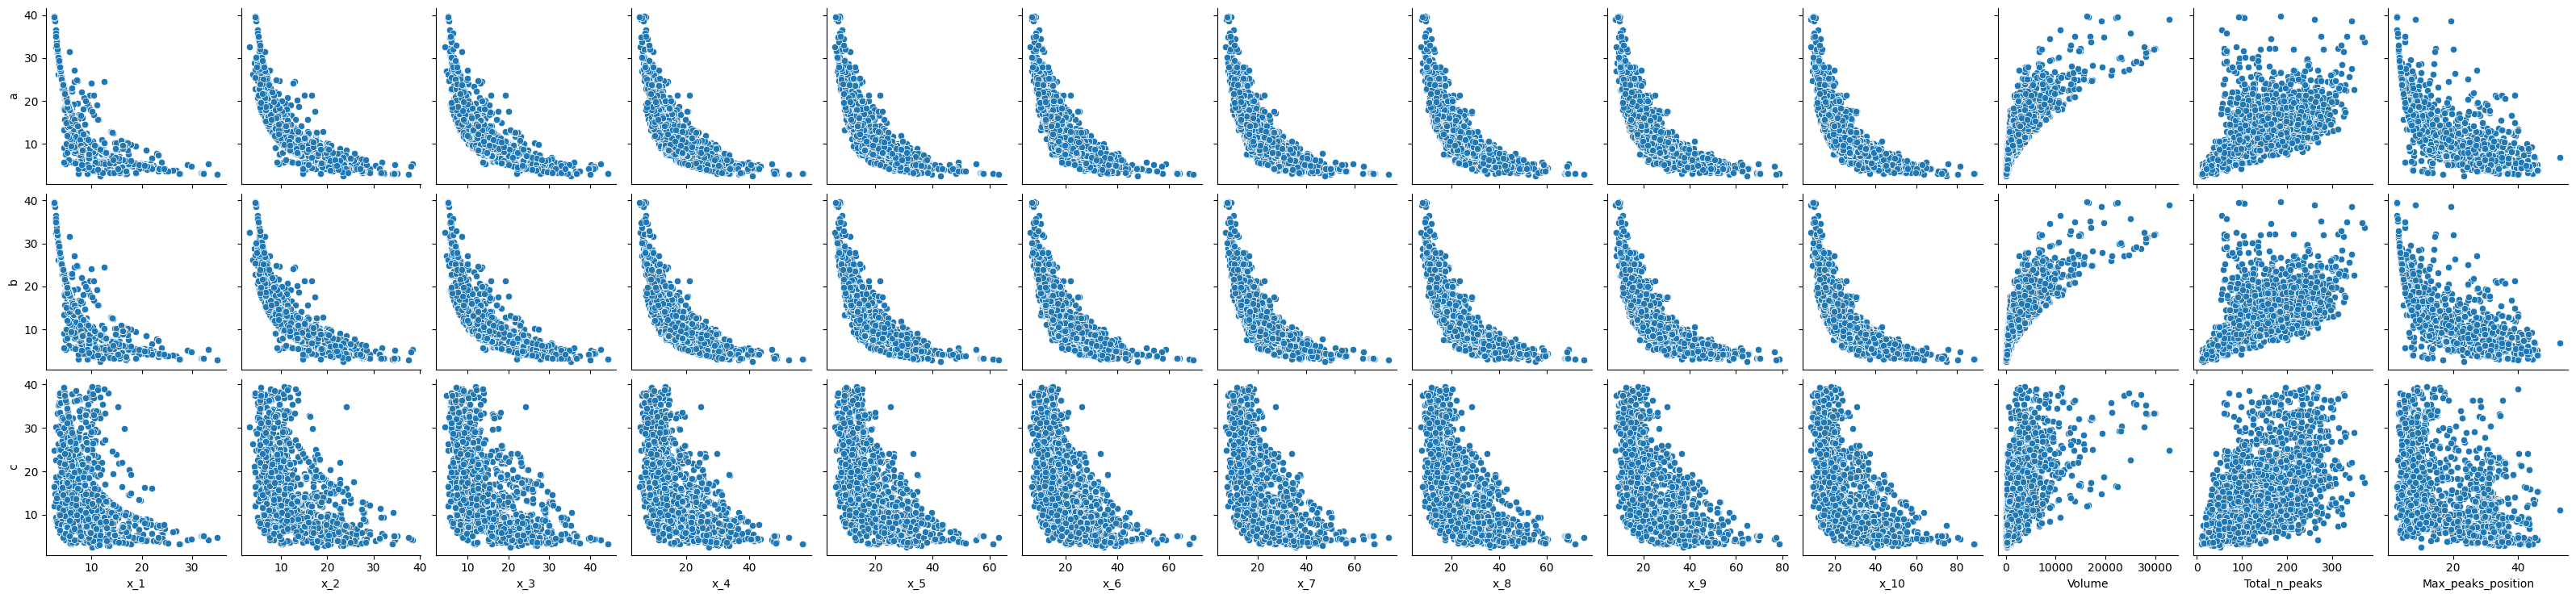

In [12]:
print('Pairplot of hexagonal dataset')
sns.pairplot(y_coord_dataset, x_vars=list(filter(re.compile(r'^x_').search, 
                                                 y_coord_dataset.columns)) + 
             ['Volume', 'Total_n_peaks', 'Max_peaks_position'],
             y_vars=['a','b','c'])